In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
class Project:
    def __init__(self, p_id, p_name):
        self.p_id = p_id
        self.p_name = p_name
    def __str__(self):
        return f"Id : {self.p_id}. Name : {self.p_name}."

In [3]:
class Employee:
    def __init__(self, surname, num, salary):
        self.surname = surname
        self.num = num
        self.salary = salary
    def __str__(self):
        return f"Surname : {self.surname}. Number : {self.num}. Salary : {self.salary}."

In [4]:
class Accout:
    def __init__(self, data, p_id, emp_num, hours):
        self.data = data
        self.p_id = p_id
        self.emp_num = emp_num
        self.hours = hours

In [24]:
employees = pd.read_csv('Proj\\workers.csv')

In [22]:
employees

,worker_surname,worker_id,worker_salary
0,Smith,1,20
1,Johnson,2,22
2,Williams,3,25
3,Jones,4,18
4,Brown,5,21


In [42]:
projects = pd.read_csv('Proj\\project.csv')

In [43]:
projects

,project_id,project_name
0,1,Project A
1,2,Project B
2,3,Project C
3,5,Project D
4,4,Project E


In [44]:
accounts = pd.read_csv('Proj\\accounts.csv')

In [45]:
accounts

,date,project_id_acc,worker_id_acc,amount_of_hours
0,2023-01-10,1,2,8
1,2023-01-11,1,3,6
2,2023-01-12,2,4,7
3,2023-01-13,2,3,5
4,2023-01-14,3,1,9
5,2023-01-15,4,4,6
6,2023-01-16,4,2,7
7,2023-01-17,5,5,8
8,2023-01-18,3,1,6


In [74]:
temp = accounts.groupby(['project_id_acc'])['amount_of_hours'].sum().reset_index()
project_hours = pd.merge(temp, projects, left_on='project_id_acc', right_on='project_id')[['project_name', 'amount_of_hours']]

In [75]:
project_hours

,project_name,amount_of_hours
0,Project A,14
1,Project B,12
2,Project C,15
3,Project E,13
4,Project D,8


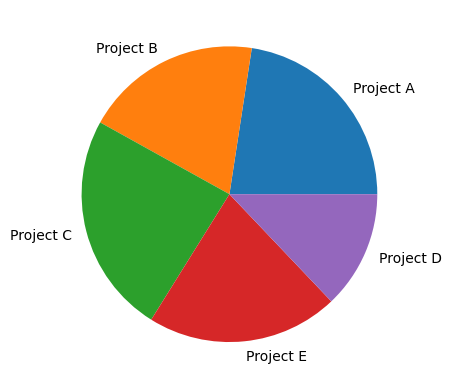

In [76]:
plt.pie(project_hours['amount_of_hours'], labels = project_hours['project_name'])
plt.show()

In [97]:
temp = pd.merge(accounts, employees, left_on='worker_id_acc', right_on='worker_id')
employees_salarys = pd.merge(temp,projects,left_on='project_id_acc', right_on='project_id')[['worker_surname','project_name','amount_of_hours','worker_salary']]

In [98]:
employees_salarys

,worker_surname,project_name,amount_of_hours,worker_salary
0,Johnson,Project A,8,22
1,Williams,Project A,6,25
2,Johnson,Project E,7,22
3,Jones,Project E,6,18
4,Williams,Project B,5,25
5,Jones,Project B,7,18
6,Smith,Project C,9,20
7,Smith,Project C,6,20
8,Brown,Project D,8,21


In [113]:
target_surname = 'Johnson'

filtered_df = employees_salarys[employees_salarys['worker_surname'] == target_surname]

temp = filtered_df.groupby('project_name').agg({'amount_of_hours': 'sum', 'worker_salary': 'sum'}).reset_index()
temp['emp_salary'] = temp['amount_of_hours'] * temp['worker_salary']

result = temp[['project_name','emp_salary']]

In [114]:
result

,project_name,emp_salary
0,Project A,176
1,Project E,154


In [139]:
max_hours_projects = filtered_df.groupby('project_name')['amount_of_hours'].sum().idxmax()

In [140]:
max_hours_projects

'Project A'